# Proyecto final
MINE-4101: Applied Data Science  
Universidad de los Andes  
Estudiantes: Alejandra Guerrero, Luis Enrique Garcia, Diego Alejandro Peña

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from datetime import date

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from pandas_profiling import ProfileReport
import xgboost as xgb
from xgboost import XGBRegressor 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\aguer\anaconda3\envs\cda_talleres\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\aguer\anaconda3\envs\cda_talleres\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Análisis Exploratorio de los datos

### Lectura de los datos

In [2]:
#from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Carga en memoria del archivo csv

#ruta_datos='./datos/HomeData.csv'

ruta_datos='./Datos/HomeData.csv'
df = pd.read_csv(ruta_datos, encoding='utf8')

In [4]:
# Visualización de los datos cargados
df

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [5]:
# Listado de columnas
df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [6]:
# Tamaño del conjunto de datos
df.shape

(503911, 32)

### Transformaciones iniciales

Se identificará el total de valores nulos por cada columna y se procederán a eliminar aquellas filas que no aporten al análisis.

In [7]:
# Conteo de filas que poseen valores nulos por cada columna
df.isna().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [8]:
# Eliminación de las filas que poseen el campo 'uso' nulo
df = df[df['use [kW]'].notna()]

Se cambiará el formato de la variable tiempo, ya que se encuentra en un formato que dificulta su interpretación, análisis y tratamiento.

In [9]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


Se agregarán campos asociadas a la variable tiempo, a partir de los cuales se podría evaluar su relación con el consumo de energía

In [10]:
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['day of week'] = df['time'].apply(lambda x : x.day_name())
df['nday of week'] = df['time'].apply(lambda x : x.weekday()+1)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,precipIntensity,dewPoint,precipProbability,year,month,day,day of week,nday of week,hour,minute
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,1
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,2
3,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,3
4,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,4


Se unirán aquellas columnas que representen el mismo concepto de consumo energético

In [11]:
# Revisión del consumo de energía para las categorías Furnace y Kitchen
df[['Furnace 1 [kW]', 'Furnace 2 [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum()

Furnace 1 [kW]     49993.062333
Furnace 2 [kW]     68924.395621
Kitchen 12 [kW]     1388.448483
Kitchen 14 [kW]     3539.012726
Kitchen 38 [kW]        4.725373
dtype: float64

In [12]:
# Unión de campos
df['Furnace [kW]'] = df[['Furnace 1 [kW]', 'Furnace 2 [kW]']].sum(axis=1)
df['Kitchen [kW]'] = df[['Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum(axis=1)

La columna CloudCover debería ser de tipo float, pero cuenta con algunos valores nominales, los cuales serán sustituidos por su valor más próximo considerando que los datos están presentes con una frecuencia de un minuto.

In [13]:
# Total de filas con valor erróneo
df.loc[df['cloudCover']=='cloudCover'].shape

(58, 41)

In [14]:
# Sustitución del valor cloudCover
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503910 entries, 0 to 503909
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 503910 non-null  datetime64[ns]
 1   use [kW]             503910 non-null  float64       
 2   gen [kW]             503910 non-null  float64       
 3   House overall [kW]   503910 non-null  float64       
 4   Dishwasher [kW]      503910 non-null  float64       
 5   Furnace 1 [kW]       503910 non-null  float64       
 6   Furnace 2 [kW]       503910 non-null  float64       
 7   Home office [kW]     503910 non-null  float64       
 8   Fridge [kW]          503910 non-null  float64       
 9   Wine cellar [kW]     503910 non-null  float64       
 10  Garage door [kW]     503910 non-null  float64       
 11  Kitchen 12 [kW]      503910 non-null  float64       
 12  Kitchen 14 [kW]      503910 non-null  float64       
 13  Kitchen 38 [kW

### Revisión de la variable tiempo

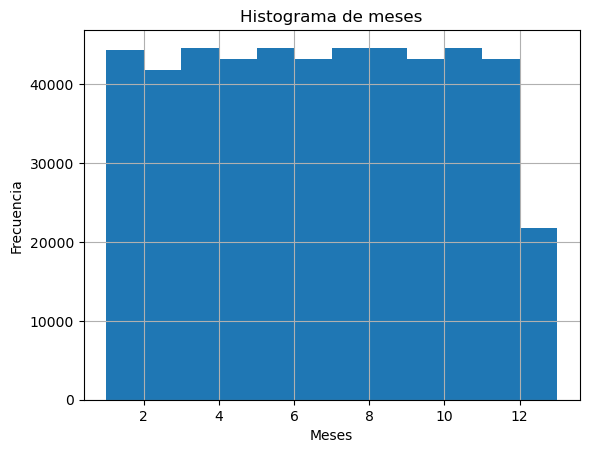

In [16]:
# Histograma para la variable Mes
intervalos = range(min(df['month']), max(df['month']) + 2)
plt.hist(x=df['month'], bins=intervalos)
plt.title('Histograma de meses')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

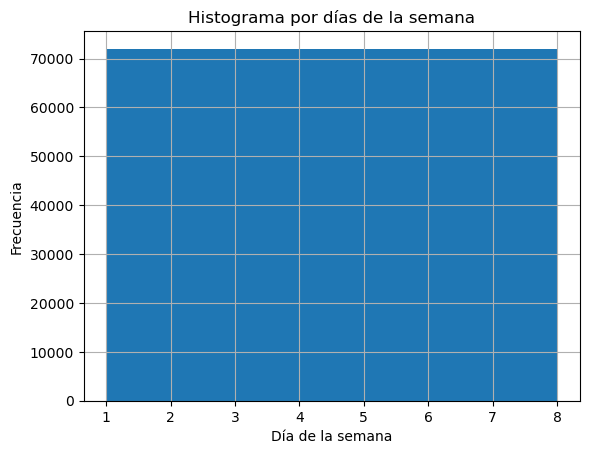

In [17]:
# Histograma para la variable día de la semana
intervalos = range(min(df['nday of week']), max(df['nday of week']) + 2)
plt.hist(x=df['nday of week'], bins=intervalos)
plt.title('Histograma por días de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

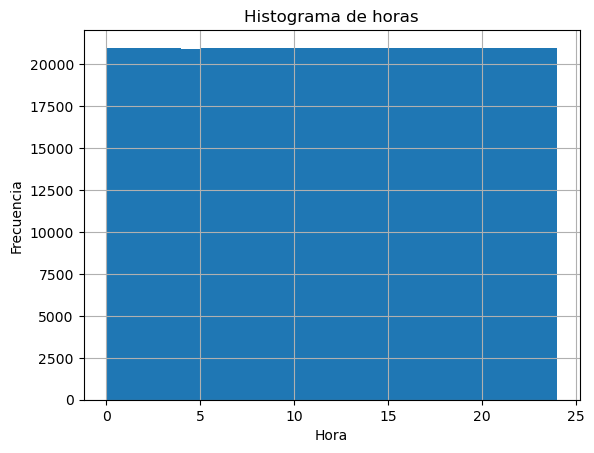

In [18]:
# Histograma para la variable Hora
intervalos = range(min(df['hour']), max(df['hour']) + 2)
plt.hist(x=df['hour'], bins=intervalos)
plt.title('Histograma de horas')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

A partir de las gráficas anteriores se puede concluir que el conjunto de datos contiene una muestra significativa para cada uno de los meses del año, excepto para diciembre, por lo cual en dicho mes se podría presentar un sesgo. A nivel de día de la semana y franja horaria se identifica que no existen huecos de información, por lo cual son variables (junto con el mes) que se pueden considerar en el análisis.

### Revisión de la variable consumo

<AxesSubplot:xlabel='month'>

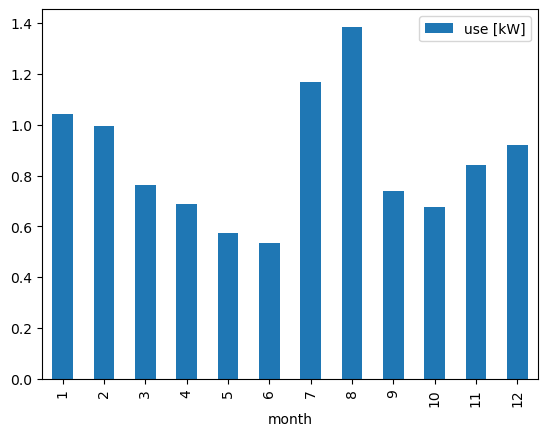

In [19]:
# Promedio del consumo de energía por mes del año
consumo_mes = df.groupby("month").agg({"use [kW]":"mean"}).reset_index()
consumo_mes.plot('month', kind = 'bar')

<AxesSubplot:xlabel='day'>

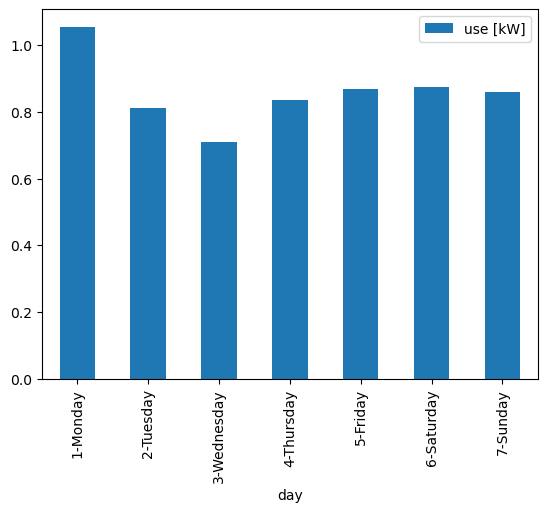

In [20]:
# Promedio del consumo de energía por día de la semana
consumo_dia = df.groupby(["nday of week", "day of week"]).agg({"use [kW]":"mean"}).reset_index()
consumo_dia['day'] = consumo_dia['nday of week'].apply(str) + '-' + consumo_dia['day of week']
consumo_dia.plot('day', 'use [kW]', kind = 'bar')

<AxesSubplot:xlabel='hour'>

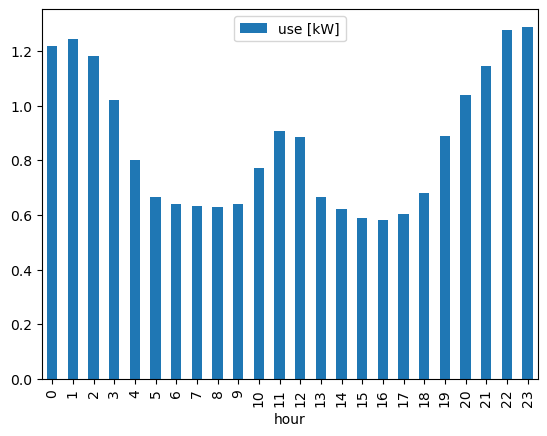

In [21]:
# Promedio del consumo de energía por hora de la semana
consumo_hora = df.groupby("hour").agg({"use [kW]":"mean"}).reset_index()
consumo_hora.plot('hour', kind = 'bar')

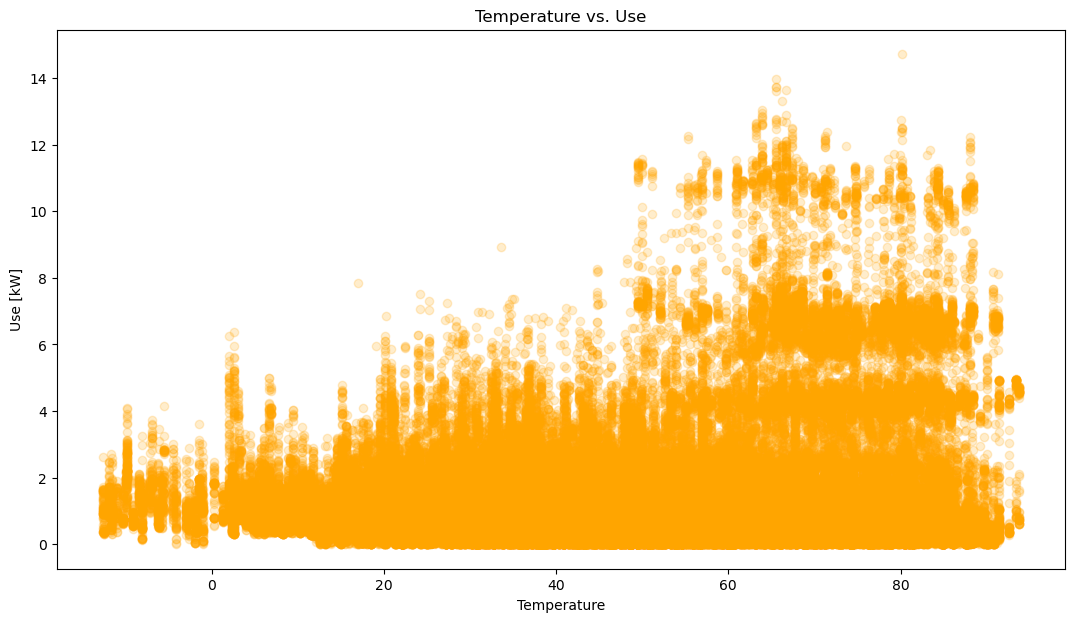

In [22]:
# Temperatura comparado contra el consumo de energía
plt.figure(figsize = (13, 7))
plt.scatter(df['temperature'], df['use [kW]'], alpha = 0.2, color = 'orange')
plt.title('Temperature vs. Use')
plt.xlabel('Temperature')
plt.ylabel('Use [kW]')
plt.show()

El promedio del consumo de energía es mayor en los meses de julio y agosto, lo cual podría relacionarse con que suelen ser los meses con mayores temperaturas. A nivel de día de la semana se identifica un incremento en el consumo de energía para el día lunes y una posterior caída en los días martes y miércoles. Finalmente, se evidencia un aumento en el consumo de energía en horas de la noche u oscuridad, que corresponde con el momento del día en el cual las personas pasan más tiempo en sus hogares y hacen uso de bombillas, electrodomésticos para fines de entretenimiento, entre otros.

### Revisión de las variables categóricas

Dentro del conjunto de datos existen dos variables categóricas que resumen las condiciones climáticas en el minuto en que se lleva a cabo el consumo de energía. A continuación se verificará la calidad de datos de los campos icon y summary.

<AxesSubplot:xlabel='icon'>

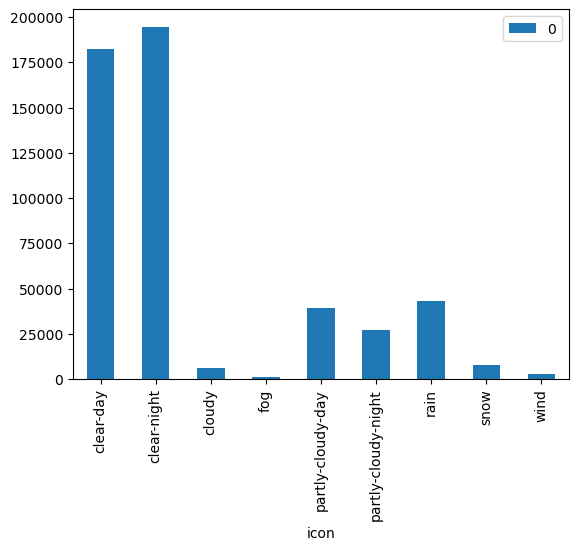

In [23]:
# Diagrama de frecuencias para la columna icon
consumo_icon = df.groupby("icon").size().reset_index()
consumo_icon.plot('icon', kind = 'bar')

<AxesSubplot:xlabel='summary'>

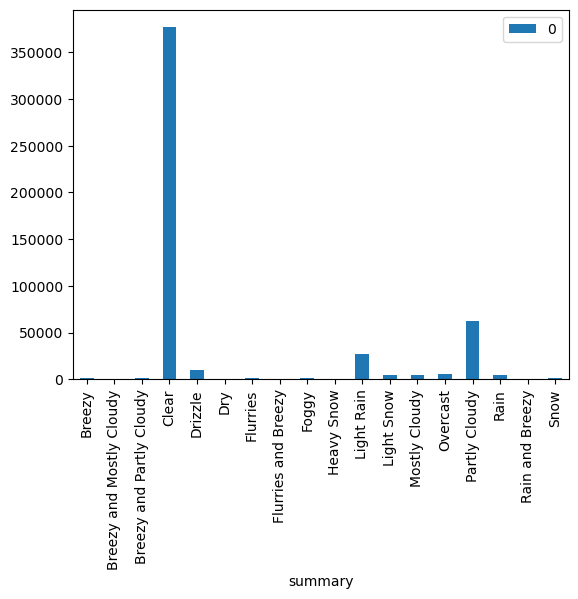

In [24]:
# Diagrama de frecuencias para la columna summary
consumo_sum = df.groupby("summary").size().reset_index()
consumo_sum.plot('summary', kind = 'bar')

Gran parte de los datos se encuentran catalogados con la condición climática "Clear-day", "Clear-night o "Clear". Al no haber una mayor distribución, se podría suponer que los datos no fueron clasificados correctamente y por tanto, estos campos no permiten crear hipótesis potenciales asociadas al consumo de energía eléctrica.

### Revision de las variables de consumo por electrodoméstico

In [25]:
# Agrupación por mes de los campos que contienen el consumo por electrodoméstico
resumen_consumo = df.groupby("month").agg({"Dishwasher [kW]":"mean", "Furnace [kW]":"mean", "Home office [kW]":"mean", "Fridge [kW]":"mean", "Wine cellar [kW]":"mean", 
                                           "Garage door [kW]":"mean", "Kitchen [kW]":"mean", "Barn [kW]":"mean", "Well [kW]":"mean", "Microwave [kW]":"mean", 
                                           "Living room [kW]":"mean"}).reset_index()

In [26]:
# Campos que contienen el consumo por electrodoméstico
campos = resumen_consumo.columns[1:]

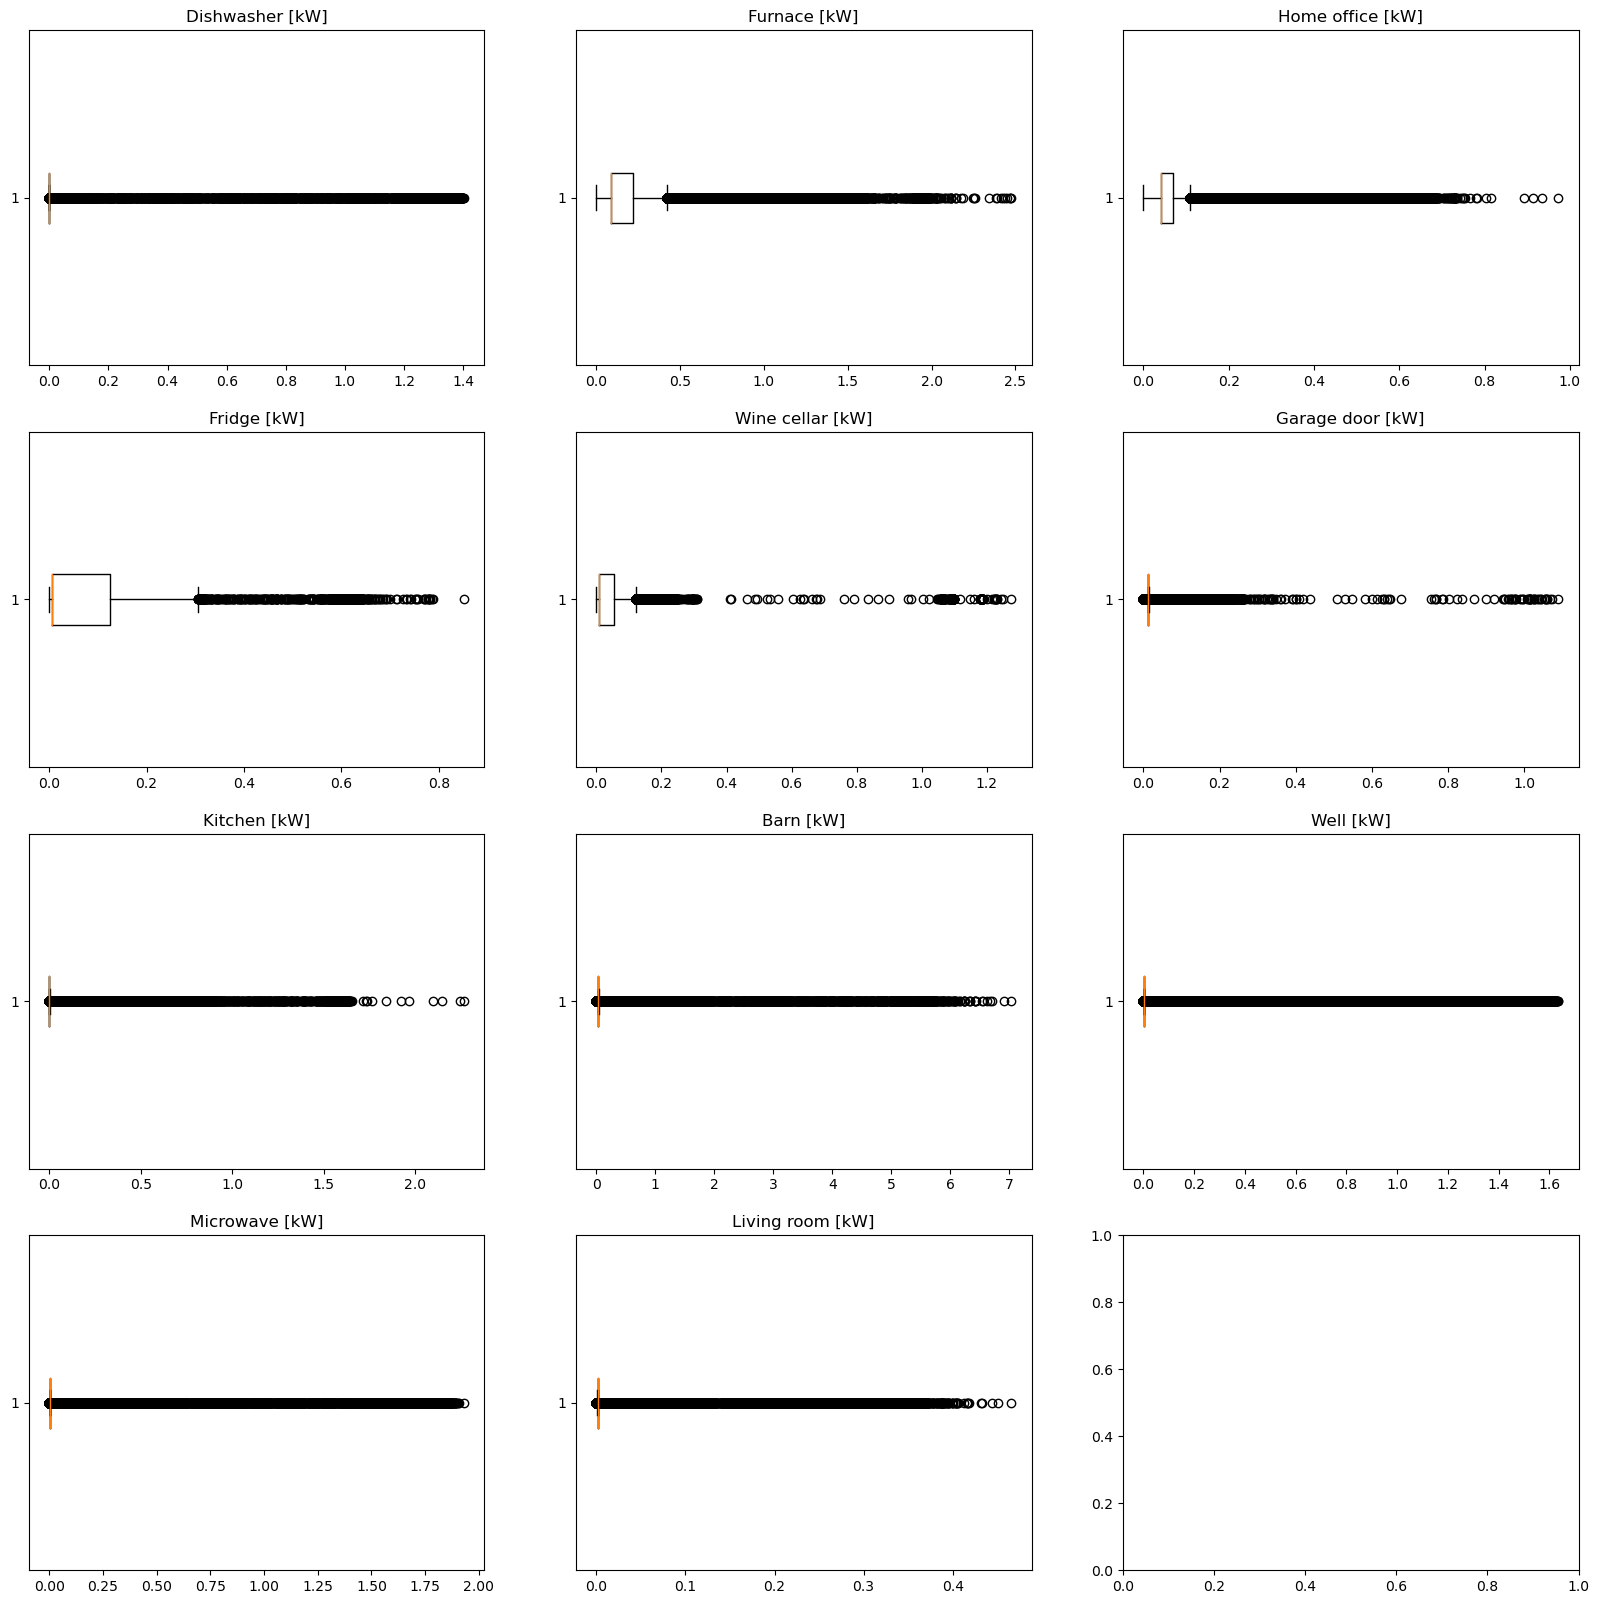

In [27]:
# Distribución del consumo por aparato eléctrico
col = 3
rows = int(np.ceil(len(campos)/col))
figure, axis = plt.subplots(rows, col, figsize=(20, 20))
j=0

for i in campos:
    x, y = int(j/col), int(j%col)
    axis[x, y].boxplot(df[i], vert=False)
    axis[x, y].set_title(i)    
    j += 1

plt.show()

Los diagramas de caja representan los datos como si existieran muchos outliers. Sin embargo, este es el comportamiento esperado considerando que el consumo suele ser esporádico. Por ejemplo, la puerta del garaje suele estar abierta o cerrada, pero en muy pocos momentos del día cambia de estado, registrando un consumo de energía. Por otro lado, el refrigerador suele permanecer conectado consumiendo constantemente electricidad; lo cual se relaciona con una caja y cuartiles más grandes.

In [28]:
meses = range(1, 12+1)

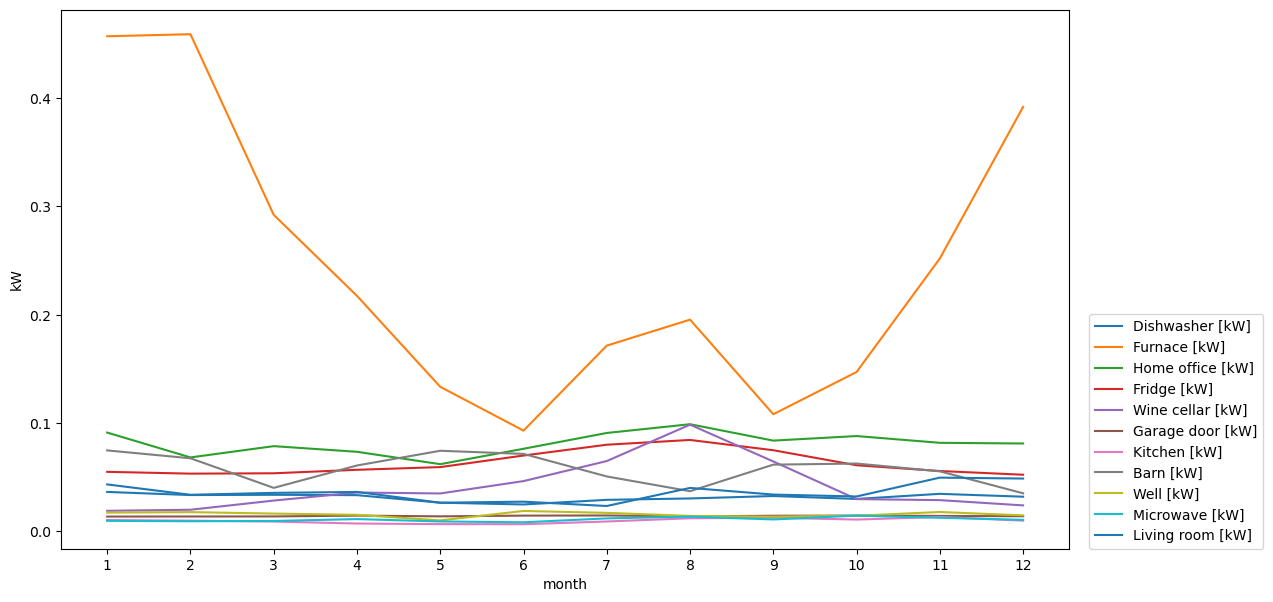

In [29]:
# Representación gráfica del consumo mensual por electrodoméstico o aparato en particular
plt.figure(figsize = (13, 7))

for i in campos:
    plt.plot(resumen_consumo['month'], resumen_consumo[i], linestyle='-', label=i)

plt.xlabel('month')
plt.ylabel('kW')
plt.xticks(meses)
plt.legend(loc=(1.02, 0))
plt.show()

La variable Furnace tiene valores más grandes en comparación con los otros campos. A primera vista, se podría asumir que impacta fuertemente el consumo total de energía. Con el fin de evaluar el comportamiento de los otros aparatos eléctricos, se omite Furnace del análisis siguiente.

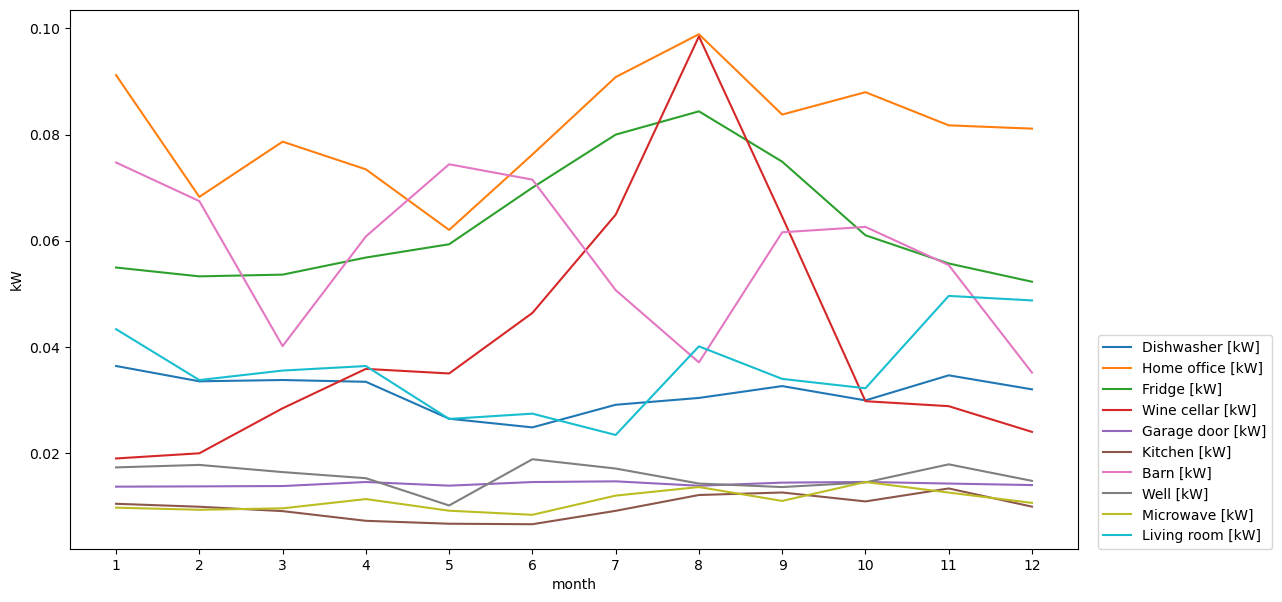

In [30]:
# Representación gráfica del consumo mensual por electrodoméstico, omitiendo Furnace
plt.figure(figsize = (13, 7))

for i in campos:
    if i != 'Furnace [kW]':
        plt.plot(resumen_consumo['month'], resumen_consumo[i], linestyle='-', label=i)

plt.xlabel('month')
plt.ylabel('kW')
plt.xticks(meses)
plt.legend(loc=(1.02, 0))
plt.show()

Como se observa en la gráfica previa, algunos electrodomésticos como refrigeradores o calefacción aumentan su consumo en los meses de mayores temperaturas (julio y agosto). Otros aparatos como la puerta del garaje, el horno microondas o aparatos de cocina tienen el mismo comportamiento durante el año y en consecuencia no afectan el consumo.

In [31]:
# Agrupación por hora de los campos que contienen el consumo por electrodoméstico
resumen_consumo = df.groupby("hour").agg({"Dishwasher [kW]":"mean", "Furnace [kW]":"mean", "Home office [kW]":"mean", "Fridge [kW]":"mean", "Wine cellar [kW]":"mean", 
                                           "Garage door [kW]":"mean", "Kitchen [kW]":"mean", "Barn [kW]":"mean", "Well [kW]":"mean", "Microwave [kW]":"mean", 
                                           "Living room [kW]":"mean"}).reset_index()

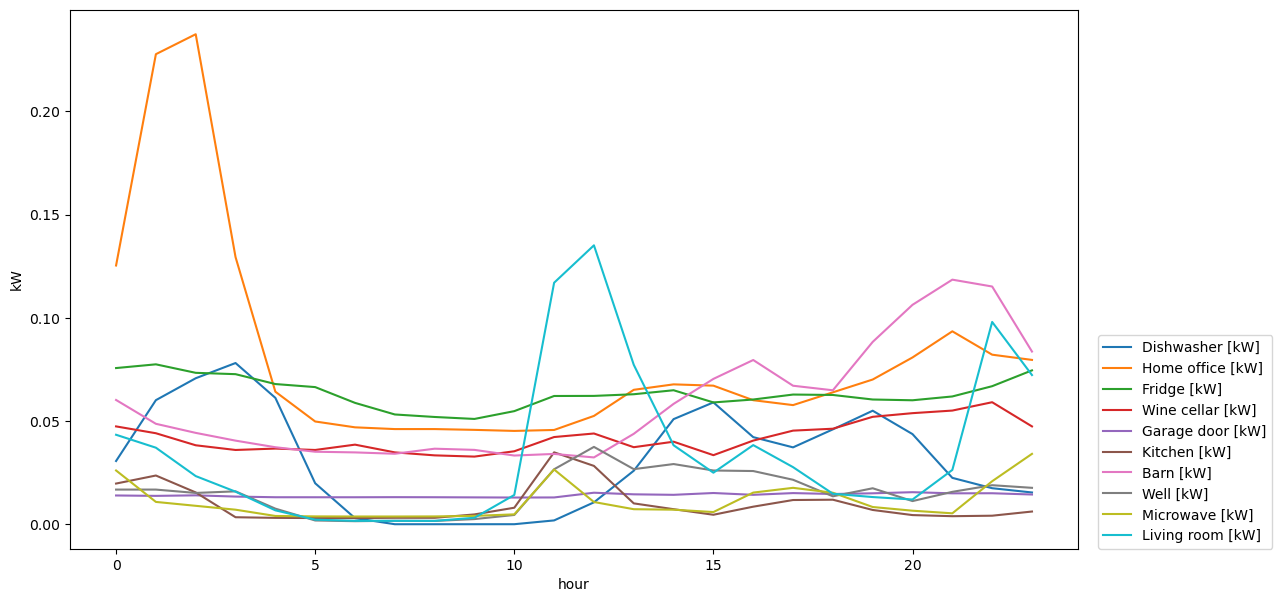

In [32]:
# Representación gráfica del consumo diario por electrodoméstico o aparato en particular
plt.figure(figsize = (13, 7))

for i in campos:
    if i != 'Furnace [kW]':
        plt.plot(resumen_consumo['hour'], resumen_consumo[i], linestyle='-', label=i)

plt.xlabel('hour')
plt.ylabel('kW')
#plt.xticks(meses)
plt.legend(loc=(1.02, 0))
plt.show()

La representación por horas del consumo muestra que existe una relación entre la hora y el consumo de energía por motivos de entretenimiento (living room), preparación de alimentos (kitchen y microwave), organización después de alimentarse (dishwasher). Sin embargo, no es claro el comportamiento del campo Home Office.

### Comparación entre el consumo de energía y la generación de energía

In [33]:
# Agrupación por mes del consumo vs generación de energía
resumen_consumo = df.groupby("month").agg({"use [kW]":sum, "gen [kW]":sum}).reset_index()

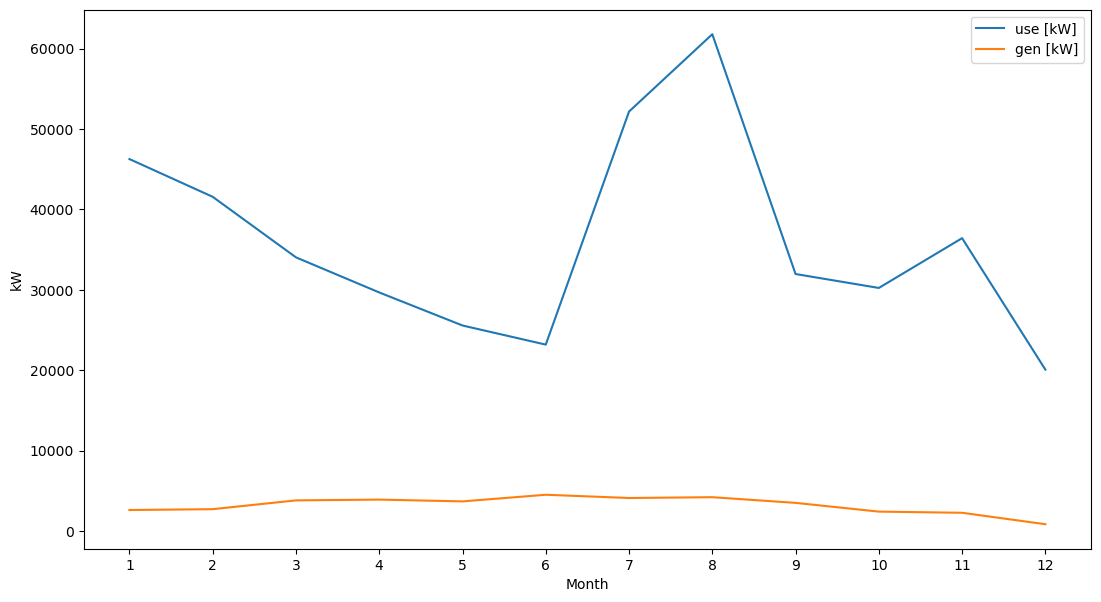

In [34]:
# Representación gráfica por mes del consumo vs generación de energía
plt.figure(figsize = (13, 7))

plt.plot(resumen_consumo['month'], resumen_consumo['use [kW]'], linestyle='-', label='use [kW]')
plt.plot(resumen_consumo['month'], resumen_consumo['gen [kW]'], linestyle='-', label='gen [kW]')

plt.xlabel('Month')
plt.ylabel('kW')
plt.xticks(meses)
plt.legend(loc = 'upper right')
plt.show()

La generación y captura de paneles solares no contrarresta o responde a la demanda de electricidad de un usuario.

### Correlación entre campos cuantitativos

In [35]:
# Matriz de correlación
df.corr()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,dewPoint,precipProbability,year,month,day,nday of week,hour,minute,Furnace [kW],Kitchen [kW]
use [kW],1.000000,-0.131635,1.000000,0.196272,0.314776,0.489414,0.147520,0.149223,0.124506,0.026531,...,0.016040,-0.003317,NaN,-0.003207,0.007126,-0.020405,0.005240,-0.000313,0.513503,0.103777
gen [kW],-0.131635,1.000000,-0.131635,0.038204,-0.020461,-0.107684,-0.085421,-0.002862,0.062430,0.036328,...,0.089664,0.041192,NaN,-0.038014,0.038253,0.004404,0.410571,0.000239,-0.082863,-0.017690
House overall [kW],1.000000,-0.131635,1.000000,0.196272,0.314776,0.489414,0.147520,0.149223,0.124506,0.026531,...,0.016040,-0.003317,NaN,-0.003207,0.007126,-0.020405,0.005240,-0.000313,0.513503,0.103777
Dishwasher [kW],0.196272,0.038204,0.196272,1.000000,0.002023,-0.008349,0.065525,0.034020,-0.004619,-0.008958,...,-0.016099,0.008189,NaN,-0.003923,-0.013282,-0.011472,-0.015590,0.001156,-0.004197,0.003272
Furnace 1 [kW],0.314776,-0.020461,0.314776,0.002023,1.000000,0.240445,-0.019692,-0.042511,-0.096036,-0.022801,...,-0.301091,0.000344,NaN,-0.203171,0.016562,-0.008269,0.044010,-0.004350,0.774086,0.014000
Furnace 2 [kW],0.489414,-0.107684,0.489414,-0.008349,0.240445,1.000000,-0.008555,-0.032574,-0.052272,0.002969,...,-0.233404,0.007913,NaN,-0.151566,-0.010192,0.004287,-0.012865,-0.002724,0.800632,0.011417
Home office [kW],0.147520,-0.085421,0.147520,0.065525,-0.019692,-0.008555,1.000000,0.035013,0.003896,-0.013537,...,0.007594,-0.032861,NaN,0.031268,-0.022400,-0.080404,-0.196688,0.000381,-0.017735,0.007517
Fridge [kW],0.149223,-0.002862,0.149223,0.034020,-0.042511,-0.032574,0.035013,1.000000,0.076183,-0.002380,...,0.115169,0.004794,NaN,0.048400,0.000145,-0.006711,-0.023261,0.002344,-0.047486,0.011322
Wine cellar [kW],0.124506,0.062430,0.124506,-0.004619,-0.096036,-0.052272,0.003896,0.076183,1.000000,0.004393,...,0.298207,0.006571,NaN,0.134409,0.027662,0.035783,0.076454,0.000860,-0.093372,0.005218
Garage door [kW],0.026531,0.036328,0.026531,-0.008958,-0.022801,0.002969,-0.013537,-0.002380,0.004393,1.000000,...,0.008350,-0.006639,NaN,0.012905,-0.000984,0.006927,0.042341,-0.004231,-0.012138,-0.000467


<AxesSubplot:>

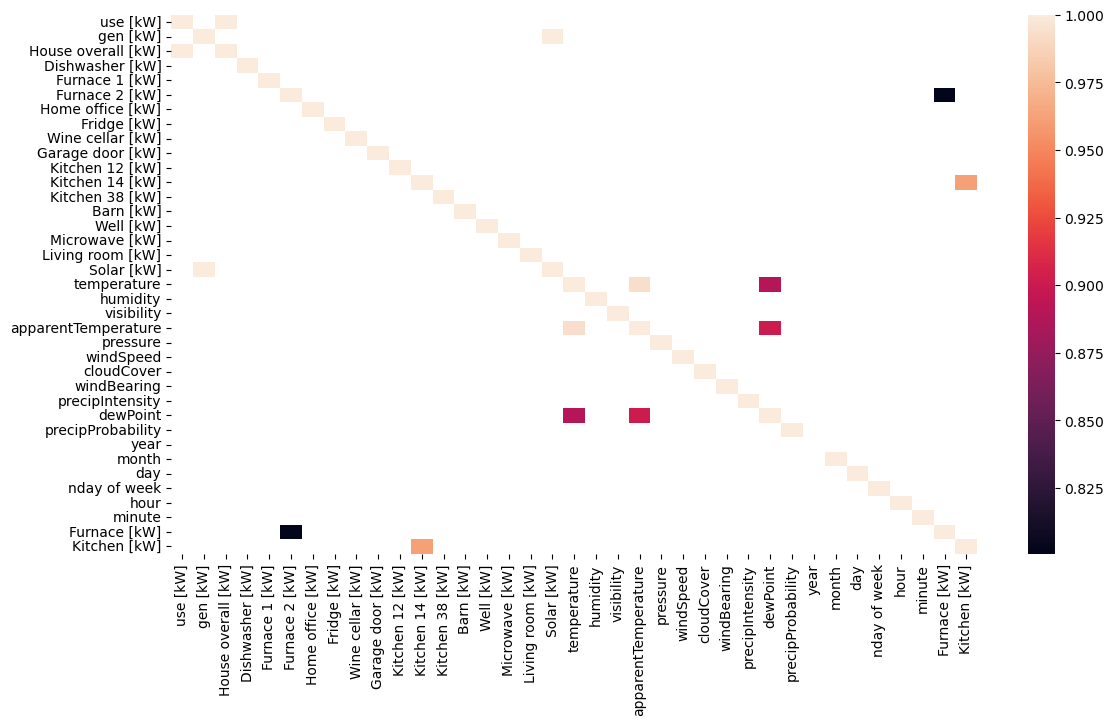

In [36]:
#Representación gráfica de la matriz de correlación filtrando por aquellas más significativas
plt.figure(figsize = (13, 7))
sns.heatmap(df.corr()[df.corr()>0.8])

Al analizar la gráfica de correlación, se decide eliminar variables que están altamente correlacionadas y por tanto no aportarían información relevante, por ejemplo: use y house overall, gen y solar, kitchen (campo totalizador) con kitchen 12-14 y 38, temperature con apparent temperature, y furnace (campo totalizador) con furnace 1 y 2.

In [37]:
df.drop(['Furnace 1 [kW]',
                'Furnace 2 [kW]',
                'Kitchen 12 [kW]',
                'Kitchen 14 [kW]',
                'Kitchen 38 [kW]',
                'apparentTemperature',
                'House overall [kW]',
                'gen [kW]', 
                'Solar [kW]',
                'icon',
                'summary',
                'year'
                ], axis=1, inplace=True, errors= 'ignore')

In [38]:
df.head()

,time,use [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],...,dewPoint,precipProbability,month,day,day of week,nday of week,hour,minute,Furnace [kW],Kitchen [kW]
0,2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,24.4,0.0,1,1,Friday,5,5,0,0.082617,0.000567
1,2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,24.4,0.0,1,1,Friday,5,5,1,0.084533,0.000567
2,2016-01-01 05:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,24.4,0.0,1,1,Friday,5,5,2,0.083017,0.000617
3,2016-01-01 05:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,24.4,0.0,1,1,Friday,5,5,3,0.175417,0.000650
4,2016-01-01 05:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,24.4,0.0,1,1,Friday,5,5,4,0.300917,0.000783


<AxesSubplot:>

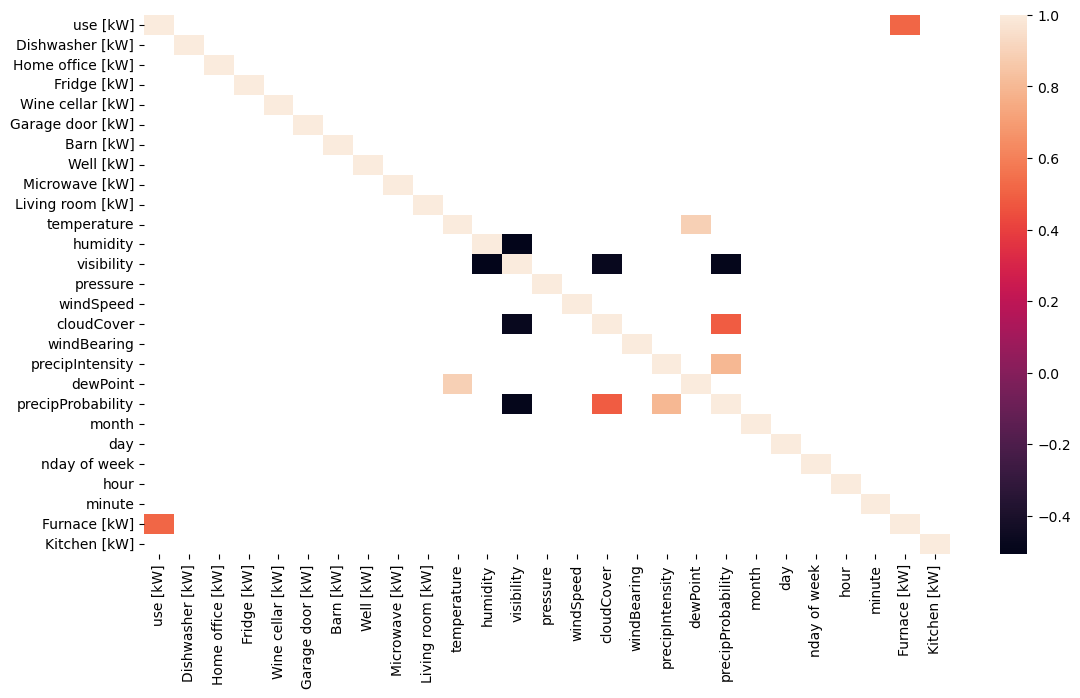

In [39]:
#Representación gráfica de la matriz de correlación filtrando por aquellas más significativas
plt.figure(figsize = (13, 7))
sns.heatmap(df.corr()[abs(df.corr())>0.45])

## Preparación de Datos

En las transformaciones iniciales que hacían parte del análisis exploratorio de los datos se eliminaron columnas altamente correlacionadas, columnas con valores que nunca cambiaban y variables categóricas con etiquetas no confiables. Además, se crearon los siguientes campos partiendo del tiempo en el cual se registró el consumo: month, day, day_of_week, nday_of_week, hour, minute. 

Adicionalmente a lo anterior, vamos a agrupar el dataset para que las predicciones estén por hora y no por minuto, ya que creemos que sería más relevante para un consumidor conocer su consumo por hora y no por minuto. Por otro lado, vamos a generar dos nuevas variables: Temporada del Año "Season" y Parte del Día "Part of the day", con el fin de agrupar períodos de tiempo que posean características particulares.

In [40]:
# Truncado de la hora de la variable time 
df['time_h'] = df['time'].apply(lambda x: x.replace(minute=0, second=0))

In [41]:
# Agrupación de los datos por hora
df_hour = df.groupby(["month", "day", "day of week", "nday of week", "hour", "time_h"]).agg( {
    "use [kW]":"sum", "Dishwasher [kW]":"sum", "Home office [kW]":"sum", "Fridge [kW]":"sum", "Wine cellar [kW]":"sum", 
    "Garage door [kW]":"sum", "Barn [kW]":"sum", "Well [kW]":"sum", "Microwave [kW]":"sum", "Living room [kW]":"sum", 
    "temperature":"mean", "humidity":"mean", "visibility":"mean", "pressure":"mean", "windSpeed":"mean", 
    "cloudCover":"mean", "windBearing":"mean", "precipIntensity":"mean", "dewPoint":"mean", "precipProbability":"mean", 
    "Furnace [kW]":"sum", "Kitchen [kW]":"sum"}).reset_index()
df_hour

,month,day,day of week,nday of week,hour,time_h,use [kW],Dishwasher [kW],Home office [kW],Fridge [kW],...,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace [kW],Kitchen [kW]
0,1,1,Friday,5,5,2016-01-01 05:00:00,62.647783,0.003817,14.508850,2.271667,...,10.000000,1016.888000,9.150333,0.750,282.100000,0.000000,24.383333,0.000,23.591283,0.049234
1,1,1,Friday,5,6,2016-01-01 06:00:00,55.090017,0.005950,2.597617,4.531317,...,10.000000,1016.232000,8.284000,0.750,284.733333,0.000000,23.866000,0.000,27.402450,0.044917
2,1,1,Friday,5,7,2016-01-01 07:00:00,42.884167,0.002550,2.604967,3.569133,...,10.000000,1015.989000,7.927000,0.750,279.400000,0.000000,23.469000,0.000,22.330200,0.043584
3,1,1,Friday,5,8,2016-01-01 08:00:00,57.600767,0.008300,3.900833,3.624717,...,10.000000,1016.042000,5.684667,0.750,265.000000,0.000000,24.202667,0.000,36.982217,0.048334
4,1,1,Friday,5,9,2016-01-01 09:00:00,38.390183,0.003617,2.603500,2.106350,...,10.000000,1015.815000,6.975000,0.625,265.500000,0.000000,24.423333,0.000,20.630550,0.047751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,12,15,Thursday,4,23,2016-12-15 23:00:00,65.819917,0.004500,2.511183,2.654150,...,9.380000,1012.775333,11.183333,0.816,189.666667,0.000373,28.414667,0.008,46.348000,0.043901
8395,12,16,Friday,5,0,2016-12-16 00:00:00,76.595083,0.003568,2.502683,3.029500,...,8.855333,1012.628500,11.969500,0.310,197.633333,0.004313,29.379167,0.182,47.760350,0.038351
8396,12,16,Friday,5,1,2016-12-16 01:00:00,75.613833,0.006000,2.515267,2.948417,...,8.576333,1012.129667,10.720667,0.310,197.900000,0.010600,30.864333,0.510,49.405067,0.045967
8397,12,16,Friday,5,2,2016-12-16 02:00:00,66.021450,0.005117,2.513983,3.003783,...,8.308333,1011.711667,7.361667,0.310,191.833333,0.010392,31.118333,0.510,42.402033,0.044034


In [42]:
# Función que retorna la estación del año dada una fecha. Asumimos que las estaciones pueden tener ordinalidad.
def season(x):
    if x < pd.to_datetime("2016-3-21"): 
        return "Winter"
    elif x > pd.to_datetime("2016-3-20") and x < pd.to_datetime("2016-6-21"):
        return "Spring"
    elif x > pd.to_datetime("2016-6-21") and x < pd.to_datetime("2016-9-24"):
        return "Summer"
    elif x > pd.to_datetime("2016-9-24") and x < pd.to_datetime("2016-12-23"):
        return "Autumn"
    else:
        return "Winter"

In [43]:
# Función que retorna el momento del día dada una hora. Asumimos que los momentos del día tienen ordinalidad.
def PartofDay(x):
    if x < 5: 
        return "Madrugada"
    elif x < 10:
        return "Manaña"
    elif x < 12:
        return "Media Mañana"
    elif x < 14:
        return "Medio Dia"
    elif x < 17:
        return "Tarde"
    elif x < 20:
        return "Tarde-Noche"
    else:
        return "Noche"

In [44]:
# Aplicacion de la función Season
df_hour['Season']=df_hour['time_h'].apply(season)

In [45]:
# Aplicacion de la función PartOfDay
df_hour['Part of the Day']=df_hour['hour'].apply(PartofDay)

In [46]:
#Transformación de las variables categóricas
enc = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(enc.fit_transform(df_hour[['Season','Part of the Day', 'day of week']]).toarray(),index=df_hour.index)
column_name = enc.get_feature_names_out()
column_name

array(['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Part of the Day_Madrugada', 'Part of the Day_Manaña',
       'Part of the Day_Media Mañana', 'Part of the Day_Medio Dia',
       'Part of the Day_Noche', 'Part of the Day_Tarde',
       'Part of the Day_Tarde-Noche', 'day of week_Friday',
       'day of week_Monday', 'day of week_Saturday', 'day of week_Sunday',
       'day of week_Thursday', 'day of week_Tuesday',
       'day of week_Wednesday'], dtype=object)

In [47]:
# Corrección de nombres de los nuevos campos 
encoder_df.rename(columns = {0:column_name[0], 1:column_name[1], 2:column_name[2], 3:column_name[3], 4:column_name[4], 5:column_name[5],
                             6:column_name[6], 7:column_name[7], 8:column_name[8], 9:column_name[9], 10:column_name[10],
                             11:column_name[11], 12:column_name[12], 13:column_name[13], 14:column_name[14], 15:column_name[15],
                             16:column_name[16], 17:column_name[17],}, inplace = True)

In [48]:
# Unión de dataframe original y los campos categóricos separados
df_hour=df_hour.join(encoder_df)

In [49]:
df_hour.head()

,month,day,day of week,nday of week,hour,time_h,use [kW],Dishwasher [kW],Home office [kW],Fridge [kW],...,Part of the Day_Noche,Part of the Day_Tarde,Part of the Day_Tarde-Noche,day of week_Friday,day of week_Monday,day of week_Saturday,day of week_Sunday,day of week_Thursday,day of week_Tuesday,day of week_Wednesday
0,1,1,Friday,5,5,2016-01-01 05:00:00,62.647783,0.003817,14.508850,2.271667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Friday,5,6,2016-01-01 06:00:00,55.090017,0.005950,2.597617,4.531317,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,Friday,5,7,2016-01-01 07:00:00,42.884167,0.002550,2.604967,3.569133,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,Friday,5,8,2016-01-01 08:00:00,57.600767,0.008300,3.900833,3.624717,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,Friday,5,9,2016-01-01 09:00:00,38.390183,0.003617,2.603500,2.106350,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Se define el dataframe que vamos a utilizar en la construcción de los diferentes modelos 
x = df_hour[['month', 'day',#'nday of week', 'Part of the Day', 'Season', 
             'temperature','humidity','visibility','pressure','windSpeed','cloudCover','windBearing',
           'precipIntensity','dewPoint','precipProbability','Dishwasher [kW]', 'Home office [kW]', 'Fridge [kW]','Wine cellar [kW]','Garage door [kW]','Barn [kW]','Well [kW]',
           'Microwave [kW]','Living room [kW]','Furnace [kW]','Kitchen [kW]',
           'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Part of the Day_Madrugada', 'Part of the Day_Manaña', 'Part of the Day_Media Mañana', 
           'Part of the Day_Medio Dia', 'Part of the Day_Noche', 'Part of the Day_Tarde', 'Part of the Day_Tarde-Noche',
            'day of week_Monday', 'day of week_Tuesday', 'day of week_Wednesday', 'day of week_Thursday', 'day of week_Friday', 'day of week_Saturday', 'day of week_Sunday']]
y = df_hour[['use [kW]']]

In [51]:
# Conjunto de datos a usar para entrenar los modelos
x

,month,day,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,...,Part of the Day_Noche,Part of the Day_Tarde,Part of the Day_Tarde-Noche,day of week_Monday,day of week_Tuesday,day of week_Wednesday,day of week_Thursday,day of week_Friday,day of week_Saturday,day of week_Sunday
0,1,1,36.131000,0.619667,10.000000,1016.888000,9.150333,0.750,282.100000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,35.838667,0.610000,10.000000,1016.232000,8.284000,0.750,284.733333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,35.385000,0.613000,10.000000,1015.989000,7.927000,0.750,279.400000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,35.282000,0.640000,10.000000,1016.042000,5.684667,0.750,265.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,35.451667,0.641667,10.000000,1015.815000,6.975000,0.625,265.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,12,15,36.990000,0.712000,9.380000,1012.775333,11.183333,0.816,189.666667,0.000373,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8395,12,16,37.584167,0.721667,8.855333,1012.628500,11.969500,0.310,197.633333,0.004313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8396,12,16,36.429333,0.801000,8.576333,1012.129667,10.720667,0.310,197.900000,0.010600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8397,12,16,35.580833,0.836667,8.308333,1011.711667,7.361667,0.310,191.833333,0.010392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Estrategia de Validación y Selección de Modelo

A continuación se segmentará el conjunto de datos en set de entrenamiento (80%) y set de pruebas (20%). La validación del modelo se realizará usando el algoritmo GridSearch, el cual se encarga de tomar una parte de los datos de entrenamiento para validar el resultado e iterar 

In [52]:
# Creación del set de pruebas y el set de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [53]:
Y_test.shape

(1680, 1)

Vale la pena revisar que los tres conjuntos de datos mantengan la misma distribución de datos. Se revisará la distribución de los datos por fecha y por target.

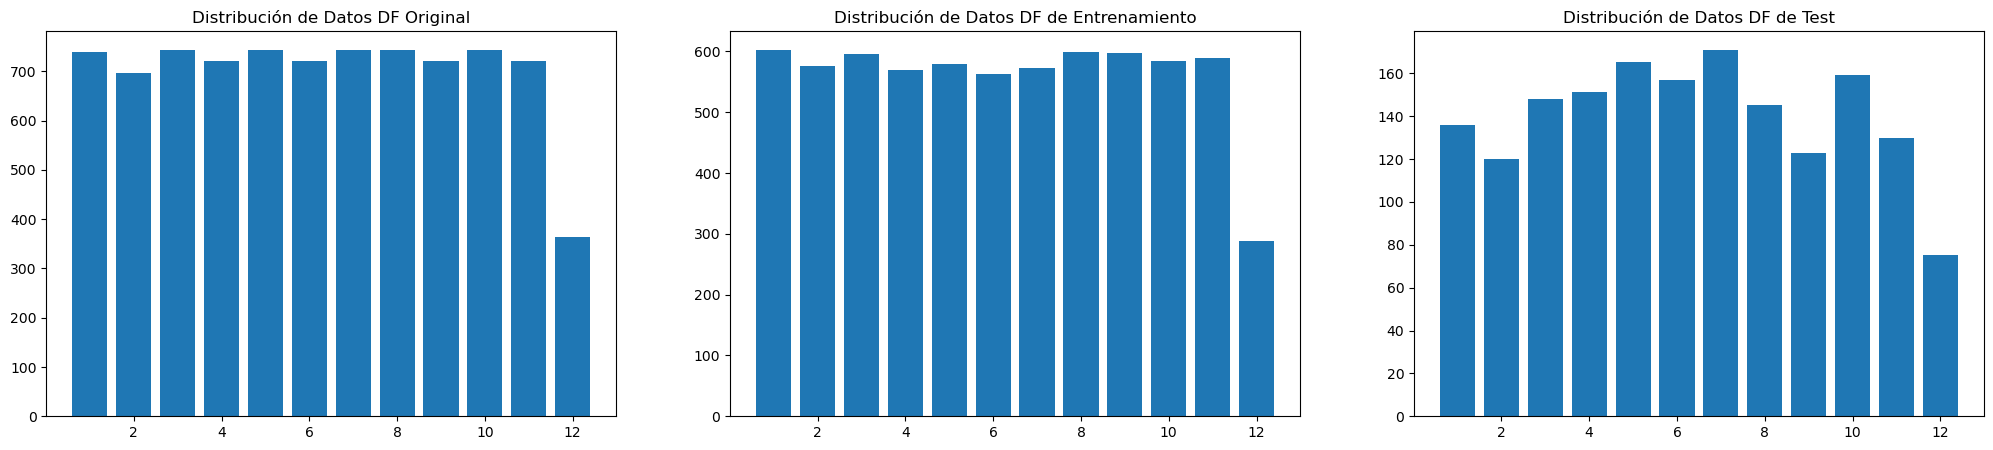

In [54]:
# Distribución de los datos por mes
figure, axis = plt.subplots(1, 3, figsize=(25, 5))

# Promedio del consumo de energía por mes del año del DF original
consumo_mes_NewDF = df_hour.groupby("month").size().reset_index(name='num_registers')
axis[0].bar(consumo_mes_NewDF['month'], consumo_mes_NewDF['num_registers'])
axis[0].set_title('Distribución de Datos DF Original')

# Promedio del consumo de energía por mes del año del DF de entrenamiento
consumo_mes_train = X_train.groupby("month").size().reset_index(name='num_registers')
axis[1].bar(consumo_mes_train['month'], consumo_mes_train['num_registers'])
axis[1].set_title('Distribución de Datos DF de Entrenamiento')

# Promedio del consumo de energía por mes del año del DF de test
consumo_mes_test = X_test.groupby("month").size().reset_index(name='num_registers')
axis[2].bar(consumo_mes_test['month'], consumo_mes_test['num_registers'])
axis[2].set_title('Distribución de Datos DF de Test')
    
plt.show()

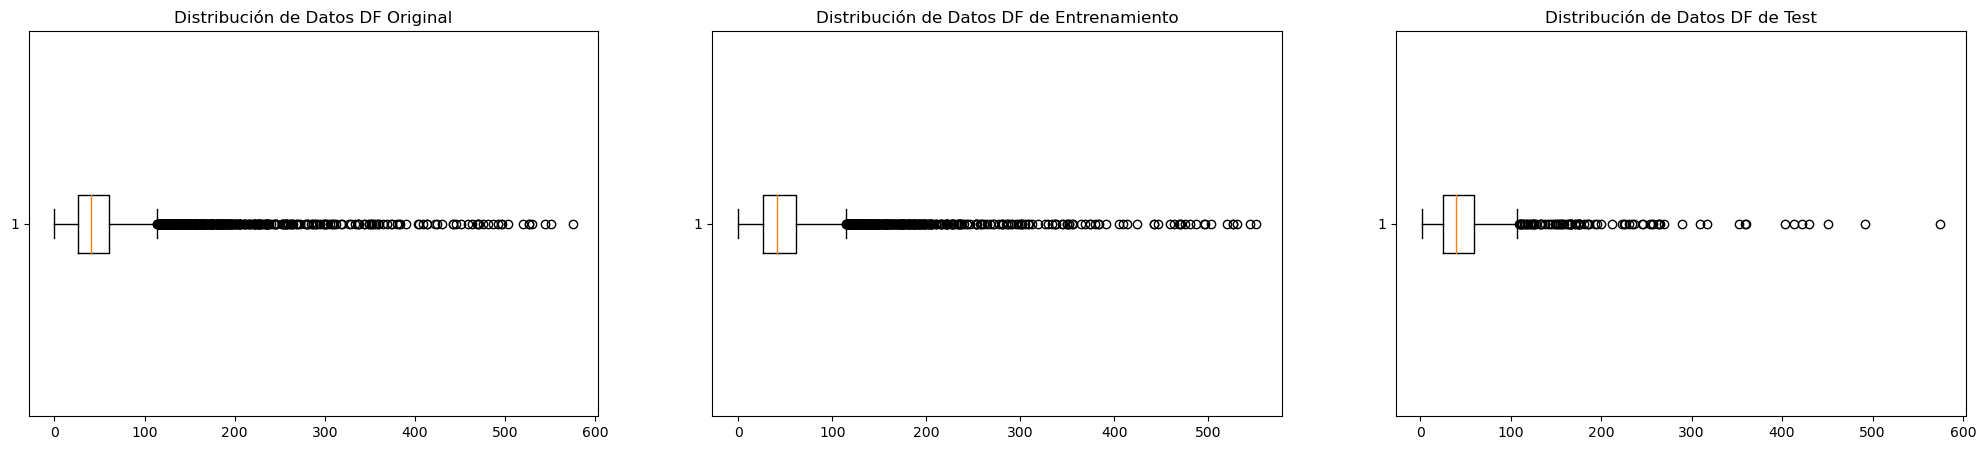

In [55]:
# Comportamiento de la variable target
figure, axis = plt.subplots(1, 3, figsize=(25, 5))

# Promedio del consumo de energía por mes del año del DF original
axis[0].boxplot(y, vert=False)
axis[0].set_title('Distribución de Datos DF Original')

# Promedio del consumo de energía por mes del año del DF de entrenamiento
axis[1].boxplot(Y_train, vert=False)
axis[1].set_title('Distribución de Datos DF de Entrenamiento')

# Promedio del consumo de energía por mes del año del DF de test
axis[2].boxplot(Y_test, vert=False)
axis[2].set_title('Distribución de Datos DF de Test')
    
plt.show()

In [56]:
y.describe(), Y_train.describe(), Y_test.describe()

(          use [kW]
 count  8399.000000
 mean     51.534676
 std      48.398038
 min       0.048000
 25%      25.775450
 50%      40.558717
 75%      61.007775
 max     574.811067,
           use [kW]
 count  6719.000000
 mean     51.880226
 std      48.654469
 min       0.048000
 25%      25.808250
 50%      40.891900
 75%      61.436842
 max     550.925050,
           use [kW]
 count  1680.000000
 mean     50.152681
 std      47.347628
 min       2.136417
 25%      25.735979
 50%      39.414758
 75%      59.148433
 max     574.811067)

Con esto podemos validar que la distribución de los datos en los meses es muy similar entre los distintos dataframes. Por otro lado, la variable que se va a predecir también sigue un comportamiento parecido en los tres sets. 

## Construcción del Modelo

Despues de la preparación de datos, vamos a correr varios modelos para identificar cuál se adapta mejor a las variables que tenemos. Luego de estandarizar los modelos, se procederá a crear modelos en los cuales se vaya aumentando el nivel de complejidad. Por otra parte, se usarán las bondades de gridSearch para identificar los parámetros que mejor optimizan los resultados del modelo; gridSearch se parametrizará con validación cruzada de 5 Folds para que rote la fracción de datos que usará para evaluar el modelo.

In [57]:
# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Regresión Lineal

In [58]:
# Creación de un modelo de regresión lineal
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

preds_train = regr.predict(X_train_scaled)
preds_test = regr.predict(X_test_scaled)

In [59]:
#Calculo del RMSE
MAE_LinealRegression_train=mean_absolute_error(Y_train, preds_train)
MAE_LinealRegression_test=mean_absolute_error(Y_test, preds_test)

In [60]:
#Calculo del RMSE
RMSE_LinealRegression_train=np.sqrt(mean_squared_error(Y_train, preds_train))
RMSE_LinealRegression_test=np.sqrt(mean_squared_error(Y_test, preds_test))
print(RMSE_LinealRegression_train, RMSE_LinealRegression_test)

30.63395947500606 29.735523986339313


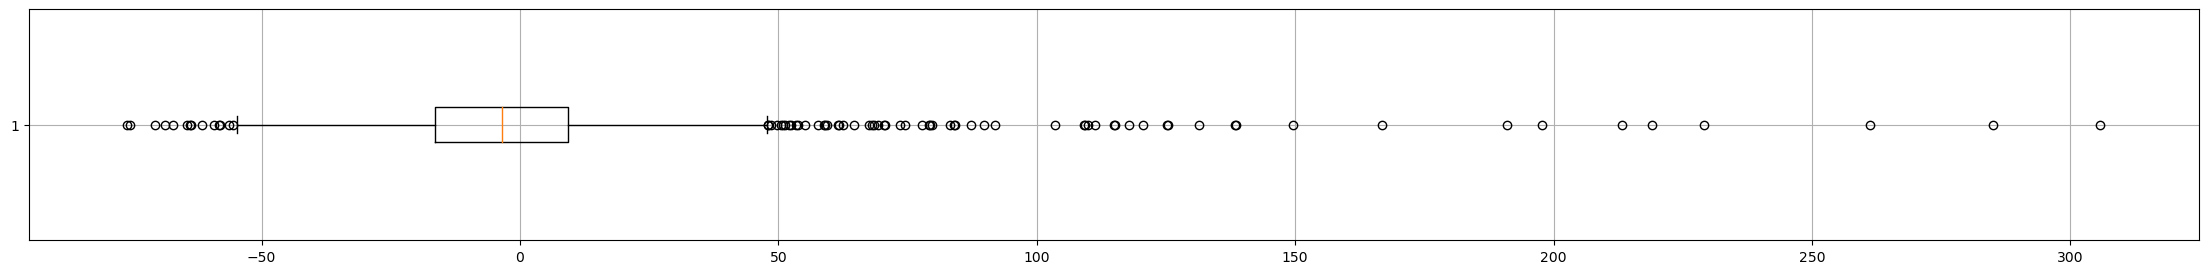

In [61]:
# Regresión lineal
# Diferencias entre el valor predicho y el valor real sobre el set de validación
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - preds_test), vert = False)
plt.grid()
plt.show()

A partir de lo anterior, se podría concluir que este modelo no presenta underfitting. Pero, se intentará disminuir el error.

### 2. Regresión polinomial sin regularización

In [62]:
# Selección del mejor modelo de regresión lineal con transformación polinomial de grado 1, 2 y 3, y sin regularización
estimators = [('polyRegression', PolynomialFeatures(degree=2, include_bias=False)),
              ('linearRegression', LinearRegression()),
              ]
pipe = Pipeline(estimators)

param_grid = dict(polyRegression__degree=[1, 2],
                  polyRegression__include_bias=[False])

grid_sinreg = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=3)

grid_sinreg.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END polyRegression__degree=1, polyRegression__include_bias=False;, score=0.592 total time=   0.0s
[CV 2/5] END polyRegression__degree=1, polyRegression__include_bias=False;, score=0.602 total time=   0.0s
[CV 3/5] END polyRegression__degree=1, polyRegression__include_bias=False;, score=0.569 total time=   0.0s
[CV 4/5] END polyRegression__degree=1, polyRegression__include_bias=False;, score=0.598 total time=   0.0s
[CV 5/5] END polyRegression__degree=1, polyRegression__include_bias=False;, score=0.605 total time=   0.0s
[CV 1/5] END polyRegression__degree=2, polyRegression__include_bias=False;, score=0.909 total time=   0.4s
[CV 2/5] END polyRegression__degree=2, polyRegression__include_bias=False;, score=0.896 total time=   0.4s
[CV 3/5] END polyRegression__degree=2, polyRegression__include_bias=False;, score=0.866 total time=   0.5s
[CV 4/5] END polyRegression__degree=2, polyRegression__include_bias=False;, score=0.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polyRegression',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linearRegression',
                                        LinearRegression())]),
             param_grid={'polyRegression__degree': [1, 2],
                         'polyRegression__include_bias': [False]},
             verbose=3)

In [63]:
print(grid_sinreg.best_params_)

{'polyRegression__degree': 2, 'polyRegression__include_bias': False}


In [64]:
#Estimación de resultados con el mejor modelo
poly_train = grid_sinreg.best_estimator_.predict(X_train_scaled)
poly_test = grid_sinreg.best_estimator_.predict(X_test_scaled)

In [65]:
#Calculo del MAE
MAE_PolynomialRegression_train=mean_absolute_error(Y_train, poly_train)
MAE_PolynomialRegression_test=mean_absolute_error(Y_test, poly_test)

In [66]:
#Calculo del RMSE
RMSE_PolynomialRegression_train=np.sqrt(mean_squared_error(Y_train, poly_train))
RMSE_PolynomialRegression_test=np.sqrt(mean_squared_error(Y_test, poly_test))
print(RMSE_PolynomialRegression_train, RMSE_PolynomialRegression_test)

12.320524120869587 14.805393927349183


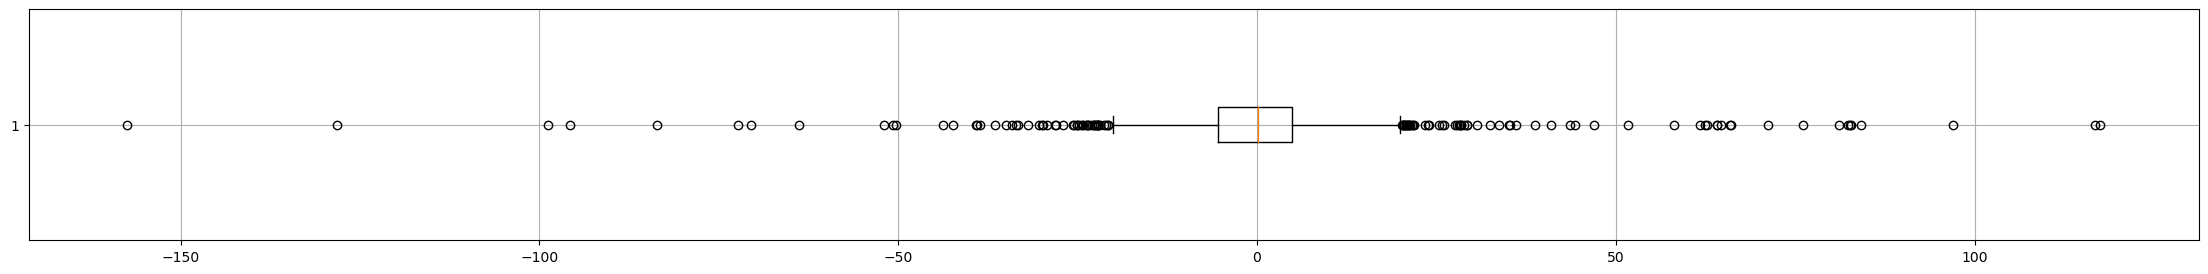

In [67]:
# Regresión polinómica de grado 3
# Diferencias entre el valor predicho y el valor real sobre el set de validación
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - poly_test), vert = False)
plt.grid()
plt.show()

A partir de lo anterior, se podría concluir que este modelo no presenta underfitting. Además, se comporta mejor que el modelo de regresión lineal simple. 
Como siguiente paso, se intentará disminuir el error aplicando regularización L1 y L2.

### 3. Regresión Polinomial con regularización LASSO (L1)

In [68]:
# Selección del mejor modelo de regresión con transformación polinomial de grado 1, 2 y 3, y regularización L1
estimators = [('polyRegression',PolynomialFeatures(degree=2, include_bias=False)),
              ('LassoRegression', Lasso(alpha=0.001)),
             ]

pipe = Pipeline(estimators)

param_grid = dict(polyRegression__degree=[1, 2],
                  LassoRegression__alpha= [0.001, 0.01, 0.1, 1.0])

grid_l1 = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=3)

grid_l1.fit(X_train_scaled,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END LassoRegression__alpha=0.001, polyRegression__degree=1;, score=0.592 total time=   0.2s
[CV 2/5] END LassoRegression__alpha=0.001, polyRegression__degree=1;, score=0.603 total time=   0.2s
[CV 3/5] END LassoRegression__alpha=0.001, polyRegression__degree=1;, score=0.574 total time=   0.2s
[CV 4/5] END LassoRegression__alpha=0.001, polyRegression__degree=1;, score=0.598 total time=   0.2s
[CV 5/5] END LassoRegression__alpha=0.001, polyRegression__degree=1;, score=0.605 total time=   0.2s
[CV 1/5] END LassoRegression__alpha=0.001, polyRegression__degree=2;, score=0.906 total time=   6.7s
[CV 2/5] END LassoRegression__alpha=0.001, polyRegression__degree=2;, score=0.896 total time=   6.6s
[CV 3/5] END LassoRegression__alpha=0.001, polyRegression__degree=2;, score=0.867 total time=   6.2s
[CV 4/5] END LassoRegression__alpha=0.001, polyRegression__degree=2;, score=0.879 total time=   6.2s
[CV 5/5] END LassoRegression__a

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polyRegression',
                                        PolynomialFeatures(include_bias=False)),
                                       ('LassoRegression',
                                        Lasso(alpha=0.001))]),
             param_grid={'LassoRegression__alpha': [0.001, 0.01, 0.1, 1.0],
                         'polyRegression__degree': [1, 2]},
             verbose=3)

In [69]:
print(grid_l1.best_params_)

{'LassoRegression__alpha': 0.1, 'polyRegression__degree': 2}


In [70]:
#Estimación de resultados con el mejor modelo
df_lasso_training = grid_l1.best_estimator_.predict(X_train_scaled)
df_lasso_test = grid_l1.best_estimator_.predict(X_test_scaled)

In [71]:
#Calculo del MAE
MAE_Lasso_train=mean_absolute_error(Y_train, df_lasso_training)
MAE_Lasso_test=mean_absolute_error(Y_test, df_lasso_test)

In [72]:
#Calculo del RMSE
RMSE_Lasso_train=np.sqrt(mean_squared_error(Y_train, df_lasso_training))
RMSE_Lasso_test=np.sqrt(mean_squared_error(Y_test, df_lasso_test))
print(RMSE_Lasso_train, RMSE_Lasso_test)

12.882059540936329 14.06974751709744


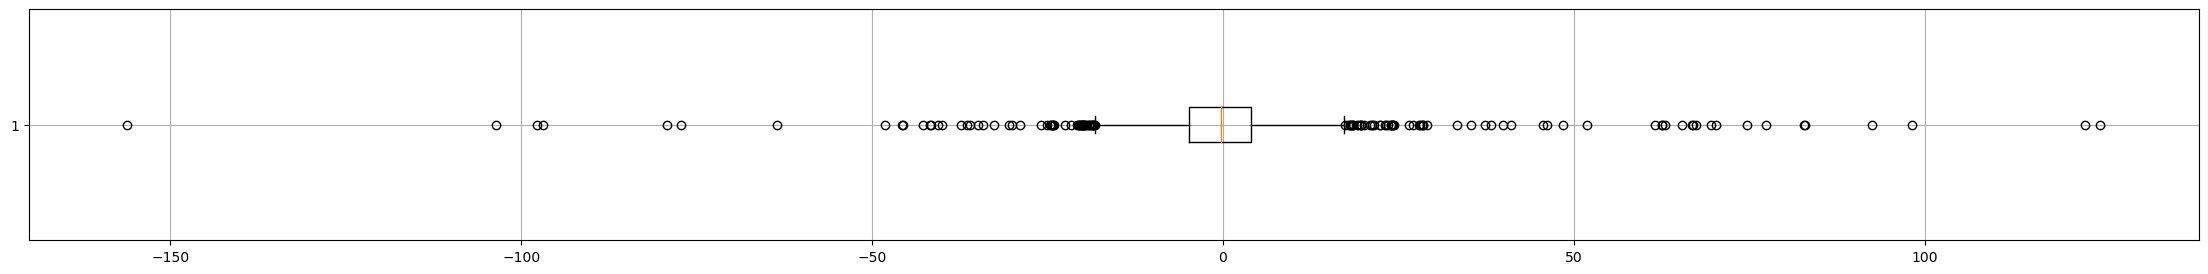

In [73]:
# Regresión polinómica de grado 2, aplicando L1 con alpha 0.001
# Diferencias entre el valor predicho y el valor real sobre el set de validación
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - df_lasso_test.reshape(1680,1)), vert = False)
plt.grid()
plt.show()

Se podría concluir que este modelo no presenta underfitting. Sin embargo, el modelo se comporta igual o mejor sin aplicar regularización.

### 4. Regresión Polinomial con regularización RIDGE (L2)

In [74]:
# Selección del mejor modelo de regresión con transformación polinomial de grado 1, 2 y 3, y regularización L2
estimators = [('polyRegression',PolynomialFeatures(degree=2, include_bias=False)),
              ('RidgeRegression', Ridge(alpha=1.0, solver='cholesky')),
             ]

pipe = Pipeline(estimators)

param_grid = dict(polyRegression__degree=[1, 2],
                  RidgeRegression__alpha= [0.1,1.0],
                  RidgeRegression__solver= ['cholesky'])

grid_l2 = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3)

grid_l2.fit(X_train_scaled,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=1;, score=0.592 total time=   0.0s
[CV 2/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=1;, score=0.603 total time=   0.0s
[CV 3/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=1;, score=0.574 total time=   0.0s
[CV 4/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=1;, score=0.598 total time=   0.0s
[CV 5/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=1;, score=0.605 total time=   0.0s
[CV 1/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=2;, score=0.909 total time=   0.1s
[CV 2/5] END RidgeRegression__alpha=0.1, RidgeRegression__solver=cholesky, polyRegression__degree=2;, score=0.896 total time=   0.1s
[CV 3/5] 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polyRegression',
                                        PolynomialFeatures(include_bias=False)),
                                       ('RidgeRegression',
                                        Ridge(solver='cholesky'))]),
             param_grid={'RidgeRegression__alpha': [0.1, 1.0],
                         'RidgeRegression__solver': ['cholesky'],
                         'polyRegression__degree': [1, 2]},
             verbose=3)

In [75]:
print(grid_l2.best_params_)

{'RidgeRegression__alpha': 0.1, 'RidgeRegression__solver': 'cholesky', 'polyRegression__degree': 2}


In [76]:
# Estimación de resultados usando el mejor modelo
df_ridge_training = grid_l2.best_estimator_.predict(X_train_scaled)
df_ridge_test = grid_l2.best_estimator_.predict(X_test_scaled)

In [77]:
#Calculo del MAE
MAE_Ridge_train=mean_absolute_error(Y_train, df_ridge_training)
MAE_Ridge_test=mean_absolute_error(Y_test, df_ridge_test)

In [78]:
#Calculo del RMSE
RMSE_Ridge_train=np.sqrt(mean_squared_error(Y_train, df_ridge_training))
RMSE_Ridge_test=np.sqrt(mean_squared_error(Y_test, df_ridge_test))
print(RMSE_Ridge_train, RMSE_Ridge_test)

12.323311152258547 14.781928104073604


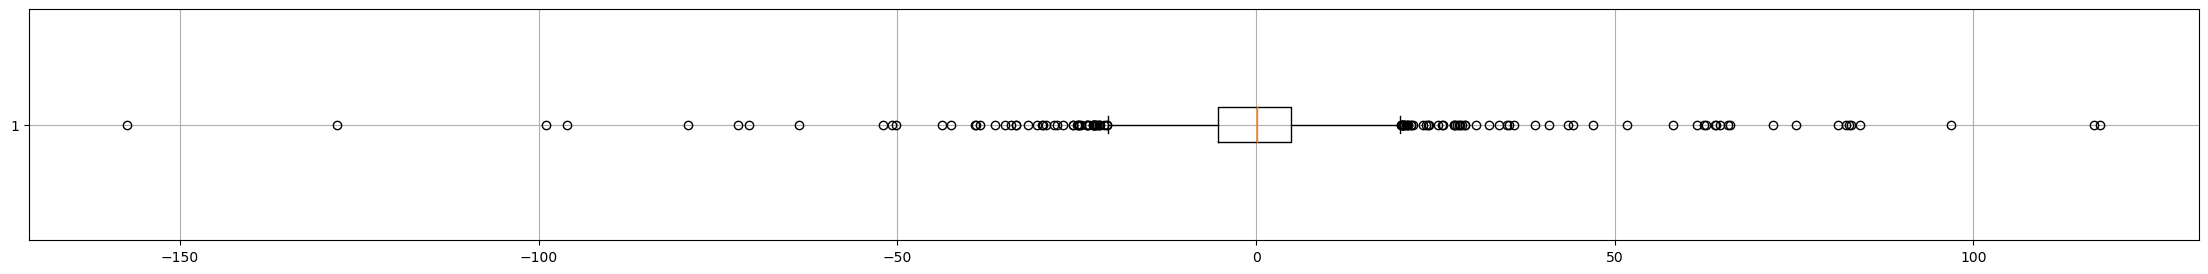

In [79]:
# Regresión polinómica de grado 2, aplicando L2 con alpha 0.1
# Diferencias entre el valor predicho y el valor real sobre el set de validación
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - df_ridge_test), vert = False)
plt.grid()
plt.show()

Con base en la gráfica anterior se podría concluir que este modelo no presenta underfitting. Sin embargo, el modelo se comporta igual que sin aplicar regularización.


### 5. Árboles de Decisión

In [80]:
# Selección del mejor modelo de regresión basado en árboles de decisión, evaluando profundidad 5, 10, 15, 20 y 25
estimators = [('treeLevels',DecisionTreeRegressor(max_depth=2)),
              ]
pipe = Pipeline(estimators)

param_grid = dict(treeLevels__max_depth=[8, 9, 10, 11, 12],
                 treeLevels__splitter=['best', 'random']
                 )

grid_dectree = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3)

grid_dectree.fit(X_train_scaled,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END treeLevels__max_depth=8, treeLevels__splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END treeLevels__max_depth=8, treeLevels__splitter=best;, score=0.791 total time=   0.0s
[CV 3/5] END treeLevels__max_depth=8, treeLevels__splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END treeLevels__max_depth=8, treeLevels__splitter=best;, score=0.851 total time=   0.0s
[CV 5/5] END treeLevels__max_depth=8, treeLevels__splitter=best;, score=0.707 total time=   0.0s
[CV 1/5] END treeLevels__max_depth=8, treeLevels__splitter=random;, score=0.818 total time=   0.0s
[CV 2/5] END treeLevels__max_depth=8, treeLevels__splitter=random;, score=0.810 total time=   0.0s
[CV 3/5] END treeLevels__max_depth=8, treeLevels__splitter=random;, score=0.776 total time=   0.0s
[CV 4/5] END treeLevels__max_depth=8, treeLevels__splitter=random;, score=0.818 total time=   0.0s
[CV 5/5] END treeLevels__max_depth=8, treeLevels__splitter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('treeLevels',
                                        DecisionTreeRegressor(max_depth=2))]),
             param_grid={'treeLevels__max_depth': [8, 9, 10, 11, 12],
                         'treeLevels__splitter': ['best', 'random']},
             verbose=3)

In [81]:
print(grid_dectree.best_params_)

{'treeLevels__max_depth': 11, 'treeLevels__splitter': 'random'}


In [82]:
#Estimación de la variable objetivo usando el mejor modelo
dectree_train = grid_dectree.best_estimator_.predict(X_train_scaled)
dectree_test = grid_dectree.best_estimator_.predict(X_test_scaled)

In [83]:
#Calculo del MAE
MAE_DecisionTree_train=mean_absolute_error(Y_train, dectree_train)
MAE_DecisionTree_test=mean_absolute_error(Y_test, dectree_test)

In [84]:
#Calculo del RMSE
RMSE_DecisionTree_train=np.sqrt(mean_squared_error(Y_train, dectree_train))
RMSE_DecisionTree_test=np.sqrt(mean_squared_error(Y_test, dectree_test))
print(RMSE_DecisionTree_train, RMSE_DecisionTree_test)

11.606022209620908 20.153147267534287


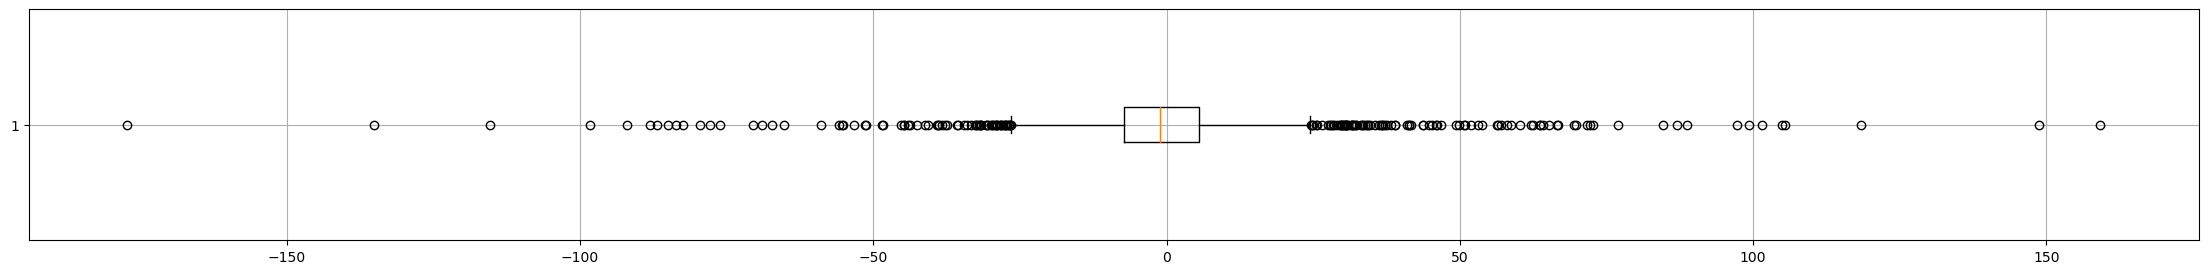

In [85]:
# Regresión basado en árboles de decisión, con grado de profundidad 25
# Diferencias entre el valor predicho y el valor real sobre el set de validación
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - dectree_test.reshape(1680,1)), vert = False)
plt.grid()
plt.show()

De acuerdo con la gráfica anterior, se podría concluir que este modelo no presenta underfitting. Sin embargo, el modelo se comporta peor que los modelos lineales o polinómicos.


### 6. XGBoost

In [86]:
estimators = [('xgboost',xgb.XGBRegressor(random_state=40, booster="gbtree")),
              ]
pipe = Pipeline(estimators)

param_grid = dict(xgboost__random_state=[5,10,20],
                  #xgboost__criterion=['gini', 'entropy'],
                  xgboost__n_estimators=[2, 3, 4, 5, 6, 7, 8, 9, 10]
                 )

grid_xgb = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=1)

grid_xgb.fit(X_train_scaled,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgboost',
                                        XGBRegressor(base_score=None,
                                                     booster='gbtree',
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     enable_categorical=False,
                                                     gamma=None, gpu_id=None,
                                                     importance_type=None,
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=40,
                                                     reg_alpha=None,
                                                     reg_lambda=None,
                                                     scale_pos_weight=None,
                                                     subsample=None,
                                                     tree_method=None,
                                                     validate_parameters=None,
                                                     verbosity=None))]),
             param_grid={'xgboost__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'xgboost__random_state': [5, 10, 20]},
             verbose=1)

In [87]:
print(grid_xgb.best_params_)

{'xgboost__n_estimators': 10, 'xgboost__random_state': 5}


In [88]:
#Estimación de la variable objetivo usando el mejor modelo
yBoost_train = grid_xgb.best_estimator_.predict(X_train_scaled)
yBoost_test = grid_xgb.best_estimator_.predict(X_test_scaled)

In [89]:
MAE_xgboost_train=mean_absolute_error(Y_train, yBoost_train)
MAE_xgboost_test=mean_absolute_error(Y_test, yBoost_test)

In [90]:
RMSE_xgboost_train=np.sqrt(mean_squared_error(Y_train, yBoost_train))
RMSE_xgboost_test=np.sqrt(mean_squared_error(Y_test, yBoost_test))
print(RMSE_xgboost_train, RMSE_xgboost_test)

10.885534235305027 15.13955039099338


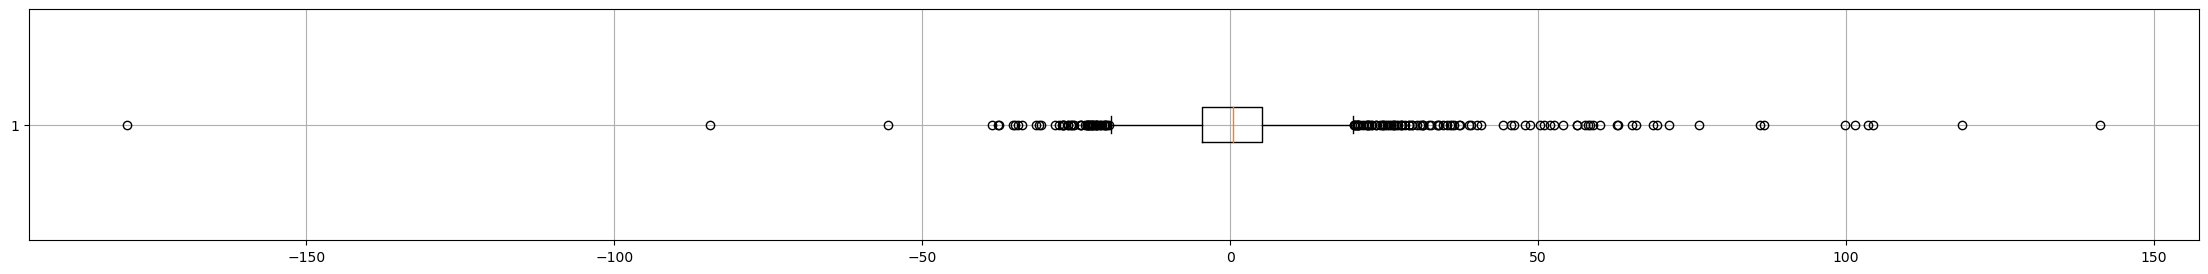

In [91]:
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - yBoost_test.reshape(1680,1)), vert = False)
plt.grid()
plt.show()

De acuerdo con la gráfica anterior, se podría concluir que aunque en este modelo se presentan mayores diferencias entre el error de entrenamiento y el erorr de validación, esas diferencias no son tan grandes para indicar que existe underfitting. Por otro lado, es el modelo que presenta un menor error entre todos los entrenados.

## Evaluación de los Modelos

### Creación del dataframe con resultados de cada modelo

In [92]:
ResultsDF = pd.DataFrame(columns=["Modelo", "Indicador", "Entrenamiento", "Prueba" ])

In [93]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion lineal simple",
                                  "Indicador": "MAE",
                                  "Entrenamiento": MAE_LinealRegression_train,
                                  "Prueba" : MAE_LinealRegression_test }, ignore_index=True)

In [94]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion Polinomial sin regularización",
                                  "Indicador": "MAE",
                                  "Entrenamiento": MAE_PolynomialRegression_train,
                                  "Prueba" : MAE_PolynomialRegression_test }, ignore_index=True)

In [95]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion Polinomial Lasso L1",
                                  "Indicador": "MAE",
                                  "Entrenamiento": MAE_Ridge_train,
                                  "Prueba" : MAE_Ridge_test }, ignore_index=True)

In [96]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion Polinomial Ridge L2",
                                  "Indicador": "MAE",
                                  "Entrenamiento": MAE_Lasso_train,
                                  "Prueba" : MAE_Lasso_test }, ignore_index=True)

In [97]:
ResultsDF = ResultsDF.append({"Modelo":"Arbol de Decisión",
                                  "Indicador": "MAE",
                                  "Entrenamiento": MAE_DecisionTree_train,
                                  "Prueba" : MAE_DecisionTree_test }, ignore_index=True)

In [98]:
ResultsDF = ResultsDF.append({"Modelo":"XGBoost",
                                  "Indicador": "MAE",
                                  "Entrenamiento": MAE_xgboost_train,
                                  "Prueba" : MAE_xgboost_test }, ignore_index=True)

In [99]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion lineal simple",
                                  "Indicador": "RMSE",
                                  "Entrenamiento": RMSE_LinealRegression_train,
                                  "Prueba" : RMSE_LinealRegression_test }, ignore_index=True)

In [100]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion Polinomial sin regularización",
                                  "Indicador": "RMSE",
                                  "Entrenamiento": RMSE_PolynomialRegression_train,
                                  "Prueba" : RMSE_PolynomialRegression_test }, ignore_index=True)

In [101]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion Polinomial Lasso L1",
                                  "Indicador": "RMSE",
                                  "Entrenamiento": RMSE_Lasso_train,
                                  "Prueba" : RMSE_Lasso_test }, ignore_index=True)

In [102]:
ResultsDF = ResultsDF.append({"Modelo":"Regresion Polinomial Ridge L2",
                                  "Indicador": "RMSE",
                                  "Entrenamiento": RMSE_Ridge_train,
                                  "Prueba" : RMSE_Ridge_test }, ignore_index=True)

In [103]:
ResultsDF = ResultsDF.append({"Modelo":"Arbol de Decisión",
                                  "Indicador": "RMSE",
                                  "Entrenamiento": RMSE_DecisionTree_train,
                                  "Prueba" : RMSE_DecisionTree_test }, ignore_index=True)

In [104]:
ResultsDF = ResultsDF.append({"Modelo":"XGBoost",
                                  "Indicador": "RMSE",
                                  "Entrenamiento": RMSE_xgboost_train,
                                  "Prueba" : RMSE_xgboost_test }, ignore_index=True)

### Evaluación de los modelos

In [105]:
ResultsDF['Diferencia'] = ResultsDF['Entrenamiento'] - ResultsDF['Prueba']
ResultsDF

,Modelo,Indicador,Entrenamiento,Prueba,Diferencia
0,Regresion lineal simple,MAE,18.729700,18.395920,0.333780
1,Regresion Polinomial sin regularización,MAE,7.377071,8.384821,-1.007750
2,Regresion Polinomial Lasso L1,MAE,7.371626,8.371111,-0.999485
3,Regresion Polinomial Ridge L2,MAE,7.222146,7.488357,-0.266211
4,Arbol de Decisión,MAE,7.485275,11.714178,-4.228904
5,XGBoost,MAE,6.924382,8.543422,-1.619040
6,Regresion lineal simple,RMSE,30.633959,29.735524,0.898435
7,Regresion Polinomial sin regularización,RMSE,12.320524,14.805394,-2.484870
8,Regresion Polinomial Lasso L1,RMSE,12.882060,14.069748,-1.187688
9,Regresion Polinomial Ridge L2,RMSE,12.323311,14.781928,-2.458617


A partir de la gráfica anterior se puede concluir que los modelos no presentan problemas de underfitting. Optamos por el modelo XGBoost puesto que presenta el menor error. En ese sentido, este sería el modelo que mejor predice la cantidad de energía que el usuario va a consumir por día y hora.

### Evaluación del mejor modelo identificado

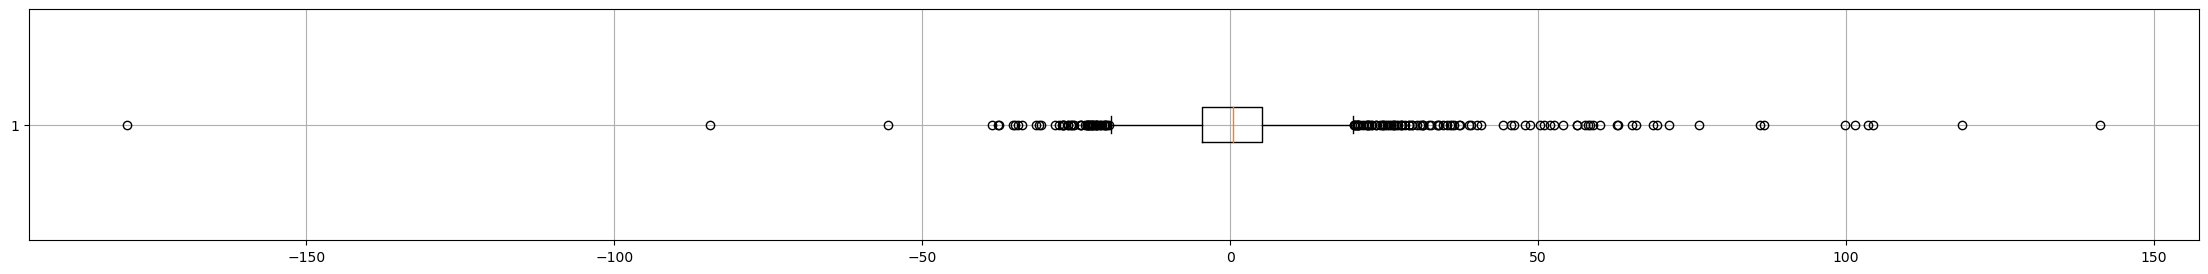

In [106]:
# Diferencias entre el valor predicho y el valor real para el set de prueba
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - yBoost_test.reshape(1680, 1)), vert = False)
plt.grid()
plt.show()

In [107]:
(Y_test - yBoost_test.reshape(1680, 1)).describe()

,use [kW]
count,1680.000000
mean,1.499989
std,15.069545
min,-179.092881
25%,-4.635775
50%,0.497113
75%,5.226353
max,141.246654


In [108]:
# Identificación de casos con diferencias mayores a 8 entre la energía consumido real y la energía consumida calculada
worst_condition = np.where(abs(Y_test - yBoost_test.reshape(1680, 1)) > 10, True, False)

worst_cases = pd.concat([
    X_test.loc[worst_condition],
    Y_test.loc[worst_condition]
], axis = 1).reset_index(drop = True)

worst_cases['predictions'] = pd.Series(yBoost_test).loc[worst_condition].reset_index(drop = True)
worst_cases.shape

(423, 43)

In [109]:
#Porcentaje del set con diferencias significativas
print(round(worst_cases.shape[0]/Y_test.shape[0]*100, 2))

25.18


De 1.680 registros que componen el set de prueba, el 25.18% presentan diferencias mayores a 10 kW. En consecuencia, el modelo no es totalmente confiable y puede conducir a márgenes de error que afectarían las decisiones del consumidor.

In [110]:
worst_cases

,month,day,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,...,Part of the Day_Tarde-Noche,day of week_Monday,day of week_Tuesday,day of week_Wednesday,day of week_Thursday,day of week_Friday,day of week_Saturday,day of week_Sunday,use [kW],predictions
0,5,16,68.310000,0.384000,10.000000,1023.622000,6.064000,0.076000,4.200000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,192.674683,116.499977
1,7,14,77.329000,0.503333,10.000000,1020.783333,5.953000,0.077333,287.766667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.831133,29.379086
2,10,24,43.974667,0.810000,9.302000,1019.497000,4.666000,0.123667,215.633333,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,119.501117,18.001432
3,2,13,-9.860333,0.735333,9.878333,1035.866667,0.889333,0.032333,339.400000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,143.704467,124.884018
4,11,29,33.289333,0.751333,7.726667,1016.215333,3.912667,0.210000,186.933333,0.000933,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,83.765667,66.970734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,11,27,29.512333,0.569333,8.736000,1030.054000,6.821000,0.000000,189.400000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,91.115867,118.833641
419,8,10,63.819333,0.927667,9.036000,1016.290333,1.695000,0.235333,280.366667,0.001503,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,109.527817,78.247314
420,11,11,36.044667,0.920000,6.453333,1024.591500,4.095500,1.000000,2.650000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,72.261983,58.820400
421,2,14,-9.157333,0.717333,9.615333,1036.081333,2.400000,0.029333,241.466667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.318850,85.804832


In [111]:
yPredicted = grid_xgb.best_estimator_.predict(x)
x['uso original']=y
x['uso predicho']=yPredicted

In [112]:
x.to_csv(r".\Datos\HomeData_predicted.csv",quotechar=',')